<a href="https://colab.research.google.com/github/mdaipayan/BE-Project-Template/blob/main/Plane_Frame_by_DSM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plane Frame to solve

Click here and upload image file figure of the truss to solve

 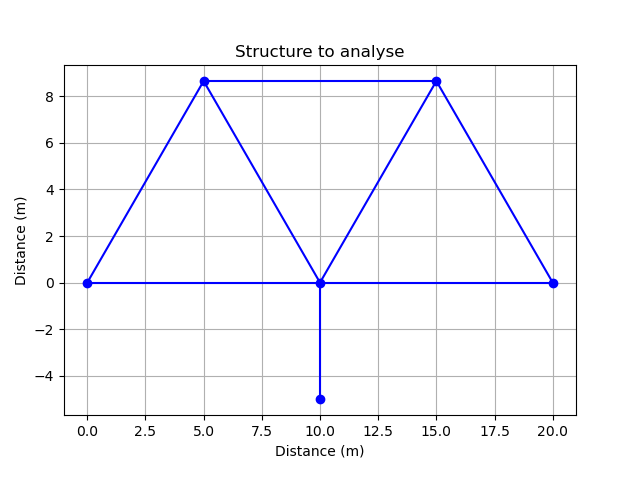

# Program Initialization

Program Starts form below

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# Module installation 
!pip install python-docx

In [50]:
 
'''
This is program prepared by D Mandal dated 17 April 2021
meant to solve 2D truss by using Driect Stiffnes Method
'''
 
# CALLING PYTHON PACKAGES
import copy
import math
 
import prompt_toolkit
from docx import Document
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import numpy as np
import os
np.set_printoptions(suppress=True)
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.serif'] = 'Times New Roman'

# Given Data

# Calculation

In [51]:
 
# function to label member number
def text(x, y, txt):
    t = axes.text(x, y, txt, backgroundcolor="white",
                  ha='center', va='top', weight='bold', color='red', alpha=1)
    t.set_bbox(dict(facecolor='white', alpha=0.1, edgecolor='white'))
 
 
# function to label node number
def text2(x, y, txt):
    t = axes.text(x, y, txt, backgroundcolor="white",
                  ha='center', va='top', weight='bold', color='green', alpha=1)
    t.set_bbox(dict(facecolor='white', alpha=0.1, edgecolor='white'))
 
 
# DEFINE INPUT DATA
# open material properties file and take E and A value
file1= open('/content/drive/MyDrive/Colab Notebooks/Frame 1/PFmatrerialproperties.txt', 'r')
E = int(file1.readline())
A = float(file1.readline())
I = float(file1.readline())
xFac = 50
 
# open nodes file and take x and y co-ordinates of the nodes
nodes = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Frame 1/PFnode.txt', dtype=float)
 
# open member file and take node i and node j numbers
members = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Frame 1/PFmember.txt', dtype=int)
num_member, nodePermember = members.shape # stores row column size

# open support file and take restrained degree of freedom
restrainedDOF = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Frame 1/PFrestraineddof.txt', dtype=int)
 
# open load file and take loading data
forceVector = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Frame 1/PFload.txt', dtype=float)

# open member load file and take data
memberload = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Frame 1/PFmemberload.txt', dtype=float) 

# open member udl laod file and take data 
udl = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Frame 1/PFudl.txt', dtype=float)


# Plot Frame

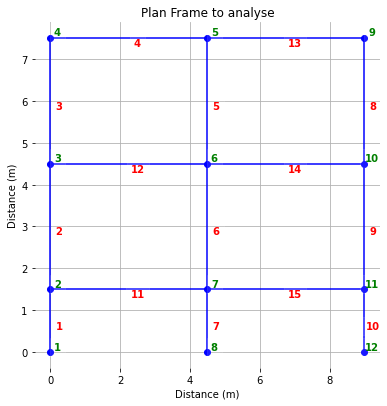

In [52]:
# PLOT THE Frame
fig = plt.figure(figsize=(6,6), frameon=False)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.box(False)


# fig.gca().set_aspect('equal', adjustable='box')
i = 0
 
# annotate node numbers
for j in range(len(nodes)):
    text2(nodes[j, 0] + 0.2, nodes[j, 1] + 0.25, j + 1)
    
# plot members
 
for mbr in members:
    node_i = mbr[0]  # Node number for node i of this member
    node_j = mbr[1]  # Node number for node j of this member
 
    ix = nodes[node_i - 1, 0]  # x-coord of node i of this member
    iy = nodes[node_i - 1, 1]  # y-coord of node i of this member
    jx = nodes[node_j - 1, 0]  # x-coord of node j of this member
    jy = nodes[node_j - 1, 1]  # y-coord of node j of this member
 
    # annotate member number
    i = i + 1
     
    text(((ix + jx) /2) + .25, ((iy + jy) /2), i) 
    axes.plot([ix, jx], [iy, jy], 'b')  # Member
 
# Plot nodes
for node in nodes:
    axes.plot([node[0]], [node[1]], 'bo')
 
axes.set_xlabel('Distance (m)')
axes.set_ylabel('Distance (m)')
axes.set_title('Plan Frame to analyse')
axes.xaxis.set_minor_locator(MultipleLocator(2))
axes.xaxis.set_minor_formatter(FormatStrFormatter('%0.1f'))
axes.yaxis.set_minor_locator(MultipleLocator(2))
axes.yaxis.set_minor_formatter(FormatStrFormatter('%0.1f'))
axes.grid()
plt.savefig("Plane Frame.png")
plt.show()

In [53]:
# define a function to calculate member orientation and length
def memberOrientation(memberNo):
    memberIndex = memberNo - 1  # Index identifying member in array of members
    node_i = members[memberIndex][0]  # Node number for node i of this member
    node_j = members[memberIndex][1]  # Node number for node j of this member

    xi = nodes[node_i - 1][0]  # x-coord for node i
    yi = nodes[node_i - 1][1]  # y-coord for node i
    xj = nodes[node_j - 1][0]  # x-coord for node j
    yj = nodes[node_j - 1][1]  # y-coord for node j
    

    # Angle of member with respect to horizontal axis

    dx = xj - xi  # x-component of vector along member
    dy = yj - yi  # y-component of vector along member
    mag = math.sqrt(dx ** 2 + dy ** 2)  # Magnitude of vector (length of member)
    memberVector = np.array([dx, dy])  # Member represented as a vector
    
    # Need to capture quadrant first then appropriate reference axis and offset angle
    if (dx > 0 and dy == 0):
        theta = 0
    elif (dx == 0 and dy > 0):
        theta = math.pi / 2
    elif (dx < 0 and dy == 0):
        theta = math.pi
    elif (dx == 0 and dy < 0):
        theta = 3 * math.pi / 2
    elif (dx > 0 and dy > 0):
        # 0<theta<90
        refVector = np.array([1, 0])  # Vector describing the positive x-axis
        theta = math.acos(
            refVector.dot(memberVector) / (mag))  # Standard formula for the angle between two vectors
    elif (dx < 0 and dy > 0):
        # 90<theta<180
        refVector = np.array([0, 1])  # Vector describing the positive y-axis
        theta = (math.pi / 2) + math.acos(
            refVector.dot(memberVector) / (mag))  # Standard formula for the angle between two vectors
    elif (dx < 0 and dy < 0):
        # 180<theta<270
        refVector = np.array([-1, 0])  # Vector describing the negative x-axis
        theta = math.pi + math.acos(
            refVector.dot(memberVector) / (mag))  # Standard formula for the angle between two vectors
    else:
        # 270<theta<360
        refVector = np.array([0, -1])  # Vector describing the negative y-axis
        theta = (3 * math.pi / 2) + math.acos(
            refVector.dot(memberVector) / (mag))  # Standard formula for the angle between two vectors
      
    return [theta, mag]
    

# Calculate orientation and length for each member and store
orientations = np.array([])  # Initialise an array to hold orientations
lengths = np.array([])  # Initialise an array to hold lengths
for n, mbr in enumerate(members):
    [angle, length] = memberOrientation(n + 1)
    orientations = np.append(orientations, angle)
    lengths = np.append(lengths, length)

# Define a function to calculate the global stiffness matrix of an axially loaded bar
def calculateKg(memberNo):
    """
    Calculate the global stiffness matrix for an axially loaded bar
    memberNo: The member number
    """
    theta = orientations[memberNo - 1]
    mag = lengths[memberNo - 1]
    L= mag

    c= round(math.cos(theta))
    s =round(math.sin(theta))
    c1 = ((E*A/L)*c**2)+((12*E*I/L**3)*s**2)
    c2 = ((E*A/L)-(12*E*I/L**3))*c*s
    c3 = (6*E*I/L**2)
    c4 = (E*I/L)
    c5 = (E*A/L)*s**2+(12*E*I/L**3)*c**2

    K11 =  np.array([[c1,c2,-c3*s],[c2,c5,c3*c],[-c3*s,c3*c,4*c4]])  # Top left quadrant of global stiffness matrix
    K12 =  np.array([[-c1,-c2,-c3*s],[-c2,-c5,c3*c],[c3*s,-c3*c,2*c4]])  # Top right quadrant of global stiffness matrix
    K21 =  np.array([[-c1,-c2,c3*s],[-c2,-c5,-c3*c],[-c3*s,c3*c,2*c4]])  # Bottom left quadrant of global stiffness matrix
    K22 =  np.array([[c1,c2,c3*s],[c2,c5,-c3*c],[c3*s,-c3*c,4*c4]])  # Bottom right quadrant of global stiffness matrix
    
    return [K11, K12, K21, K22]


nDoF = len(nodes) * 3  # Total number of degrees of freedom in the problem

Kp = np.zeros([nDoF, nDoF])  # Initialise the primary stiffness matrix
i = 0 
j = 1
for n, mbr in enumerate(members):
    # note that enumerate adds a counter to an iterable (n)

    # Calculate the quadrants of the global stiffness matrix for the member
    [K11, K12, K21, K22] = calculateKg(n + 1)
    
    node_i = mbr[0] # Node number for node i of this member
    node_j = mbr[1] # Node number for node j of this member

    # Primary stiffness matrix indices associated with each node
    # i.e. node 1 occupies indices 0, 1 and 2 (accessed in Python with [0:3])
    ia = 3 * node_i - 3  # index 0
    ib = 3 * node_i - 2  # index 1
     
    ja = 3 * node_j - 3  # index 3
    jb = 3 * node_j - 2     # index 4
   
    
    Kp[ia:ib + 2, ia:ib + 2] = Kp[ia:ib + 2, ia:ib + 2] + K11
    Kp[ia:ib + 2, ja:jb + 2] = Kp[ia:ib + 2, ja:jb + 2] + K12
    Kp[ja:jb + 2, ia:ib + 2] = Kp[ja:jb + 2, ia:ib + 2] + K21
    Kp[ja:jb + 2, ja:jb + 2] = Kp[ja:jb + 2, ja:jb + 2] + K22
    
   
print('Global stiffnes matrix\n',np.around(Kp, decimals=3)) # print Kp upto 2 decimals
restrainedIndex = [x - 1 for x in restrainedDOF]  # Index for each restrained DoF (list comprehension)

# Reduce to structure stiffness matrix by deleting rows and columns for restrained DoF
Ks = np.delete(Kp, restrainedIndex, 0)  # Delete rows
Ks = np.delete(Ks, restrainedIndex, 1)  # Delete columns
Ks = np.matrix(Ks)  # Convert Ks from numpy.ndarray to numpy.matrix to use build in inverter function

forceVectorRed = copy.copy(forceVector)  # Make a copy of forceVector so the copy can be edited, leaving the original unchanged
forceVectorRed = np.delete(forceVectorRed, restrainedIndex, 0)  # Delete rows corresponding to restrained DoF

u = Ks.I.dot(forceVectorRed)
U = u.T

# Construct the global displacement vector
UG = np.zeros(nDoF)  # Initialise an array to hold the global displacement vector
c = 0  # Initialise a counter to track how many restraints have been imposed

for i in np.arange(nDoF):
    if i in restrainedIndex:
        # Impose zero displacement
        UG[i] = 0
    else:
        # Assign actual displacement
        UG[i] = U[c]
        c = c + 1

UG = np.array([UG]).T
FG = np.matmul(Kp, UG)
print('FG\n',np.around(FG, decimals=4))
mbrForces = np.array([])  # Initialise an array to hold member forces
memberForceMatrix = np.array([]) # initialized matrix to hold member forces
for n, mbr in enumerate(members):
    theta = orientations[n]
    mag = lengths[n]

    node_i = mbr[0]  # Node number for node i of this member
    node_j = mbr[1]  # Node number for node j of this member

    # Primary stiffness matrix indices associated with each node
    ia = 3 * node_i - 3
    ib = 3 * node_i - 2
    ic = 3 * node_i - 1
    ja = 3 * node_j - 3
    jb = 3 * node_j - 2
    jc = 3 * node_j - 1

    # Transformation matrix
    c = round(math.cos(theta))
    s = round(math.sin(theta))
    T = np.array([[c, -s, 0, 0,0,0],
                  [s,c,0,0,0,0],
                  [0,0,1,0,0,0],
                  [0,0,0,c,-s,0],
                  [0,0,0,s,c,0],
                  [0,0,0,0,0,1]])
    
    # Member wise stiffness matrix
    L = mag
    c1 = E*A/L
    c2 = 12*E*I/L**3
    c3 = 6*E*I/L**2
    c4 = E*I/L
      
    k_mem = np.array([[c1, 0, 0, -c1, 0, 0],
             [0, c2, c3, 0, -c2, c3],
             [0, c3, 4*c4, 0, -c3, 2*c4],
             [-c1, 0, 0, c1, 0, 0],
             [0, -c2, -c3, 0, c2, -c3],
             [0, c3, 2*c4, 0, -c3, 4*c4]])
     
    
    # Global and local displacement matrix
    disp_global = np.array([[UG[ia], UG[ib],UG[ic], UG[ja], UG[jb],UG[jc]]]).T  # Global displacements
    disp_local = np.matmul(T, disp_global)[0]  # Local displacements
    F_axial = (A * E / mag) * (disp_local[1] - disp_local[0])  # Axial loads
    mbrForces = np.append(mbrForces, F_axial)  # Store axial loads

    # Member forces
    memberForces = np.transpose(np.matmul(k_mem,disp_local)) + memberload[n]
    memberForceMatrix = np.append(memberForceMatrix, memberForces)
    
    # print result
    print('member no.',n+1)
    print('global displacement matrix\n', np.around(disp_global, decimals=6))
    print('local displacement matrix\n', np.around(disp_local, decimals=6))
    print('member force {}\n'.format(n+1), np.around(memberForces, decimals=6))
modifiedMemeberForceMatrix = memberForceMatrix.reshape(num_member,6)
print(modifiedMemeberForceMatrix)


Global stiffnes matrix
 [[  977907.947        0.     -733430.96  ...        0.           0.
         0.   ]
 [       0.    13714562.667        0.    ...        0.           0.
         0.   ]
 [ -733430.96         0.      733430.96  ...        0.           0.
         0.   ]
 ...
 [       0.           0.           0.    ...   977907.947        0.
   -733430.96 ]
 [       0.           0.           0.    ...        0.    13714562.667
         0.   ]
 [       0.           0.           0.    ...  -733430.96         0.
    733430.96 ]]
FG
 [[  26.5331]
 [ 180.6517]
 [ -12.7453]
 [   0.    ]
 [ -79.2   ]
 [ -59.4   ]
 [   0.    ]
 [ -79.2   ]
 [ -59.4   ]
 [   0.    ]
 [ -28.64  ]
 [ -21.48  ]
 [  -0.    ]
 [ -57.285 ]
 [  -0.    ]
 [  -0.    ]
 [-158.4   ]
 [  -0.    ]
 [  -0.    ]
 [-158.4   ]
 [  -0.    ]
 [  -0.    ]
 [ 386.8617]
 [   0.    ]
 [   0.    ]
 [ -28.64  ]
 [  21.48  ]
 [   0.    ]
 [ -79.2   ]
 [  59.4   ]
 [   0.    ]
 [ -79.2   ]
 [  59.4   ]
 [ -26.5331]
 [ 180.6517]
 [  

# Plot Share Force Daigram

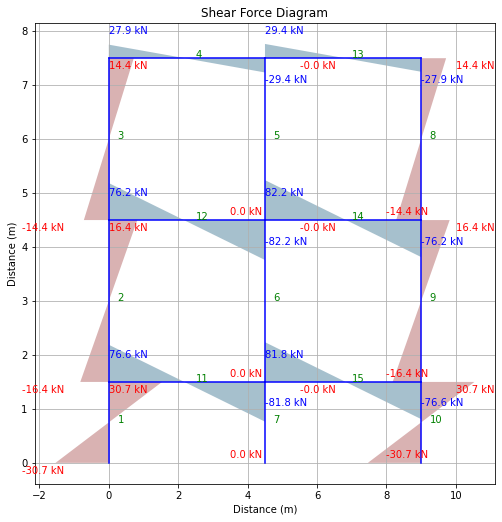

In [54]:

# PLOT SHARE FORCE DAIGRAM
if (num_member > 15):
  xfig = 15
  yfig = 15
else:
  xfig = 8
  yfig = 8
fig = plt.figure(figsize=(xfig,yfig))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
xFac = 0.05
yFac = 0.009
i = 0
# Plot members
for n, mbr in enumerate(members):
    node_i = mbr[0]  # Node number for node i of this member
    node_j = mbr[1]  # Node number for node j of this member

    ix = nodes[node_i - 1, 0]  # x-coord of node i of this member
    iy = nodes[node_i - 1, 1]  # y-coord of node i of this member
    jx = nodes[node_j - 1, 0]  # x-coord of node j of this member
    jy = nodes[node_j - 1, 1]  # y-coord of node j of this member

    
    # Index of DoF for this member
    ia = 2 * node_i - 2  # horizontal DoF at node i of this member
    ib = 2 * node_i - 1  # vertical DoF at node i of this member
    ja = 2 * node_j - 2  # horizontal DoF at node j of this member
    jb = 2 * node_j - 1  # vertical DoF at node j of this member

    # annotate member number
    i = i + 1
    axes.text(((ix + jx) /2) + .25, ((iy + jy) /2), i, color='green') 
    
    
    axes.plot([ix, jx], [iy, jy], 'b')  # Member

    # Plot Shear Force Diagram
    [angle, length] = memberOrientation(n + 1)

    if (angle != 0):

      # Fill Plot Vertical
      x = [ix + modifiedMemeberForceMatrix[n,1]* xFac, jx + modifiedMemeberForceMatrix[n,4] * xFac]
      y = [iy, jy ]
      axes.fill_betweenx(y,ix,x, facecolor=(.51, 0, 0,0.3))
      if (iy < jy):
        # Annotate Shear Force value
        txt1 = str(np.around(modifiedMemeberForceMatrix[n,1],decimals=1))
        axes.text(ix-2.5, iy-.2,txt1+' kN', color='red', fontsize=10)  

        txt2 = str(np.around(modifiedMemeberForceMatrix[n,4],decimals=1))
        axes.text(jx, jy-.2,txt2+' kN', color='red', fontsize=10) 
      else:
        # Annotate Shear Force value
        txt1 = str(np.around(modifiedMemeberForceMatrix[n,1],decimals=1))
        axes.text(ix+1, iy-.2,txt1+' kN', color='red', fontsize=10)  

        txt2 = str(np.around(modifiedMemeberForceMatrix[n,4],decimals=1))
        axes.text(jx-1, jy+.1,txt2+' kN', color='red', fontsize=10)

    else:

      # Fill Plot Horizontal
      x = [ix, jx]
      y = [iy + modifiedMemeberForceMatrix[n,1]* yFac, jy - modifiedMemeberForceMatrix[n,4] * yFac]
      axes.fill_between(x,iy,y,facecolor=(.31, .51, .61,0.5))
   
      # Annotate Shear Force value
      txt1 = str(np.around(modifiedMemeberForceMatrix[n,1],decimals=1))
      axes.text(ix, iy+.45,txt1+' kN', color='blue', fontsize=10)  

      txt2 = str(-np.around(modifiedMemeberForceMatrix[n,4],decimals=1))
      axes.text(jx, jy-.45,txt2+' kN', color='blue', fontsize=10) 


    
axes.set_xlabel('Distance (m)')
axes.set_ylabel('Distance (m)')
axes.set_title('Shear Force Diagram')
axes.grid()
plt.savefig("Shear Force Diagram.png")
plt.show()

# Plot Bending Moment Daigram

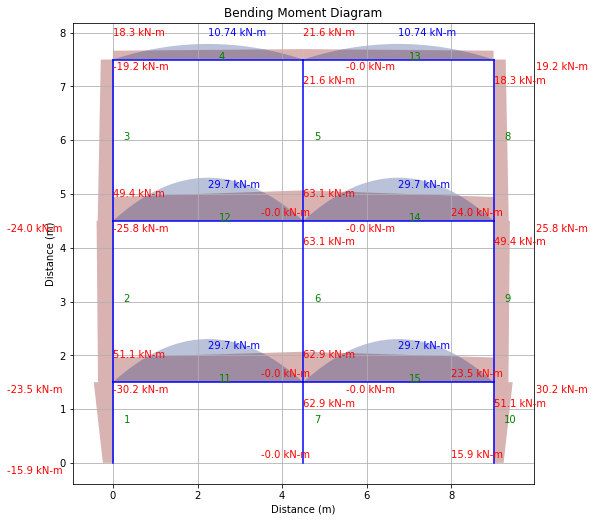

In [64]:
def positiveBendingMoment(memberNo):
  memberIndex = memberNo - 1
 
  positive_BM = (udl[memberIndex]*L**2)/8

  return [positive_BM]
                 

if (num_member > 15):
  xfig = 15
  yfig = 15
else:
  xfig = 8
  yfig = 8
fig = plt.figure(figsize=(xfig,yfig))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
xFac = 0.015
yFac = 0.009
i = 0
# Plot members
for n, mbr in enumerate(members):
    node_i = mbr[0]  # Node number for node i of this member
    node_j = mbr[1]  # Node number for node j of this member

    ix = nodes[node_i - 1, 0]  # x-coord of node i of this member
    iy = nodes[node_i - 1, 1]  # y-coord of node i of this member
    jx = nodes[node_j - 1, 0]  # x-coord of node j of this member
    jy = nodes[node_j - 1, 1]  # y-coord of node j of this member

    
    # Index of DoF for this member
    ia = 2 * node_i - 2  # horizontal DoF at node i of this member
    ib = 2 * node_i - 1  # vertical DoF at node i of this member
    ja = 2 * node_j - 2  # horizontal DoF at node j of this member
    jb = 2 * node_j - 1  # vertical DoF at node j of this member

    # annotate member number
    i = i + 1
    axes.text(((ix + jx) /2) + .25, ((iy + jy) /2), i, color='green') 
    
    
    axes.plot([ix, jx], [iy, jy], 'b')  # Member

    # Plot Shear Force Diagram
    [angle, length] = memberOrientation(n + 1)
    l = length
    

    if (angle != 0):

      # Fill Plot Vertical
      x = [ix + modifiedMemeberForceMatrix[n,2]* xFac, jx + modifiedMemeberForceMatrix[n,5] * xFac]
      y = [iy, jy ]
      axes.fill_betweenx(y,ix,x, facecolor=(.51, 0, 0,0.3))
      
      if (iy < jy):
        # Annotate Shear Force value
        txt1 = str(np.around(modifiedMemeberForceMatrix[n,2],decimals=1))
        axes.text(ix-2.5, iy-.2,txt1+' kN-m', color='red', fontsize=10)  

        txt2 = str(np.around(modifiedMemeberForceMatrix[n,5],decimals=1))
        axes.text(jx, jy-.2,txt2+' kN-m', color='red', fontsize=10) 
      else:
        # Annotate Shear Force value
        txt1 = str(np.around(modifiedMemeberForceMatrix[n,2],decimals=1))
        axes.text(ix+1, iy-.2,txt1+' kN-m', color='red', fontsize=10)  

        txt2 = str(np.around(modifiedMemeberForceMatrix[n,5],decimals=1))
        axes.text(jx-1, jy+.1,txt2+' kN-m', color='red', fontsize=10)

    else:

      # Fill Plot Horizontal support moment
      x = [ix, jx]
      y = [iy + modifiedMemeberForceMatrix[n,2]* yFac, jy - modifiedMemeberForceMatrix[n,5] * yFac]
      axes.fill_between(x,iy,y,facecolor=(.51, .0, .0,0.3))


      # Fill plot positive moment
      x1 = np.arange(0,jx-ix,0.01)  
      y1 = np.array(iy + (udl[n]*x1*0.5*(l-x1))*yFac)
      x2 = np.arange(ix,jx,0.01)
      axes.fill_between(x2,iy, y1, facecolor=(0.11,0.21,0.51,0.3))

      # Annotate -ve Bending Moment value
      txt1 = str(np.around(modifiedMemeberForceMatrix[n,2],decimals=1))
      axes.text(ix, iy+.45,txt1+' kN-m', color='red', fontsize=10)  

      txt2 = str(-np.around(modifiedMemeberForceMatrix[n,5],decimals=1))
      axes.text(jx, jy-.45,txt2+' kN-m', color='red', fontsize=10) 

      # Annotate +ve bending moment at mid span
      mid_moment = np.around(udl[n]*l**2/24,decimals=2)
      txt3 = str(mid_moment)+ ' kN-m'
      axes.text((ix+jx)/2, iy+mid_moment*yFac+0.35,txt3, color='blue', fontsize=10)
    
axes.set_xlabel('Distance (m)')
axes.set_ylabel('Distance (m)')
axes.set_title('Bending Moment Diagram')
axes.grid()
plt.savefig("Bending Moment Diagram.png")
plt.show()

# Output Documentation

In [56]:
# WRITING OUT IN WORD FILE

document = Document()
document.add_heading('Plane Frame 1 analysis Report Using Python', 0)

document.add_picture('Plane Frame.png')

document.add_heading('Reactions (+ve upward/right, -ve downwards/left)', level=1)
document.styles['Normal'].font.name = 'Times New Roman'
for i in np.arange(0, len(restrainedIndex)):
    index = restrainedIndex[i]
    if ((index+1)%3==0):
      unit = ' kN-m'
    else:
      unit = ' kN'
        
    document.add_paragraph('Reaction at DoF ' + str(index + 1) + ' : ' + str(round(FG[index].item(), 2)) + unit) 
                           

document.add_heading('Member Forces', level=1)
table = document.add_table(rows=num_member+1, cols=7)
heading = ['Member No.', 'Left Axial Force (kN)', 'Left Shear Force (kN)', 
           'Left Bending Moment (kN-m)', 'Right Axial Force (kN)', 
           'Right Shear Force (kN)', 'Right Bending Moment (kN-m)']
for i in range(7):
  table.cell(0,i).text=heading[i]

for n, mbr in enumerate(members):
    table.cell(n+1,0).text=str(n + 1)
    for i in range(6):
      table.cell(n+1,i+1).text=str(np.around(modifiedMemeberForceMatrix[n,i], decimals=2))

    

document.add_heading('Nodal Displacements (+ve upward, -ve downwards)', level=1)
for n, node in enumerate(nodes):
    ix = 2 * (n + 1) - 2  # horizontal DoF for this node
    iy = 2 * (n + 1) - 1  # vertical DoF for this node

    ux = round(UG[ix, 0], 5)  # Horizontal nodal displacement
    uy = round(UG[iy, 0], 5)  # Vertical nodal displacement
    document.add_paragraph('Node ' + str(n + 1) + ' : ' + 'Ux = ' + str(ux) + ' m,' + 'Uy = ' + str(uy) + ' m')

document.add_picture('Shear Force Diagram.png')
document.add_heading('Prepared by D Mandal', 2)
document.save('Plane Frame Result.docx')




Download your result document from temporary folder at side bar